### Задание 1
На основании датасета для каждого покупателя получите:
* предпочитаемый метод оплаты;
* общие траты;
* количество денег, потраченных на дополнительные услуги и аксессуары.

In [26]:
import pandas as pd

# Грузим датасет из csv
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv', sep = ',')

# df.head()

# 1) метод оплаты
preferred_payment = df.groupby('Customer ID')['Payment Method'].agg(pd.Series.mode).reset_index()
preferred_payment.columns = ['Customer ID', 'Preferred Payment Method']

# 2) Общие траты
total_spent = df.groupby('Customer ID')['Total Price'].sum().reset_index()
total_spent.columns = ['Customer ID', 'Total Amount Spent']

# 3) На доп. услуги
additional = df.groupby('Customer ID')['Add-on Total'].sum().reset_index()
additional.columns = ['Customer ID', 'Additional Amount']

# Объединение в общий dataframe 
preferred_payment.merge(total_spent, on='Customer ID') \
                           .merge(additional, on='Customer ID')

,Customer ID,Preferred Payment Method,Total Amount Spent,Additional Amount
0,1000,"[Credit Card, Paypal]",6279.42,66.30
1,1002,"[Cash, Credit Card]",5020.60,60.16
2,1003,Cash,41.50,35.56
3,1004,Credit Card,83.00,65.78
4,1005,"[Debit Card, Paypal]",11779.11,75.33
...,...,...,...,...
12131,19994,Bank Transfer,5504.87,93.17
12132,19995,Credit Card,5394.56,0.00
12133,19996,"[Bank Transfer, Credit Card, PayPal]",27296.78,432.12
12134,19997,Bank Transfer,2528.26,101.34


### Задание2
 1.Наоснованиидатасетаполучитедоход:
 * покаждомуметодудоставки,
 * покаждомутипупродукта,
 * подополнительнымуслугамзакаждыймесяц,
 * подополнительнымуслугамзакаждыйквартал.
 2.Отобразитеполученныеданныенаграфике.

In [29]:
# Преобразование столбца Purchase Date в формат даты
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Создание новых столбцов для года, месяца и квартала
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')

# 1. Доход по каждому методу доставки
income_by_shipping = df.groupby('Shipping Type')['Total Price'].sum().reset_index()

# 2. Доход по каждому типу продукта
income_by_product = df.groupby('Product Type')['Total Price'].sum().reset_index()

# Считаем доход по дополнительным услугам за каждый месяц
monthly_income = df.groupby(['Year', 'Month'])['Add-on Total'].sum().reset_index()

# Считаем доход по дополнительным услугам за каждый квартал
quarterly_income = df.groupby(['Year', 'Quarter'])['Add-on Total'].sum().reset_index()
# Вывод результатов
print("Доход по каждому методу доставки:")
print(income_by_shipping)

print("\nДоход по каждому типу продукта:")
print(income_by_product)

# Вывод результатов
print("Доход по дополнительным услугам за каждый месяц:")
print(monthly_income)

print("\nДоход по дополнительным услугам за каждый квартал:")
print(quarterly_income)


Доход по каждому методу доставки:
  Shipping Type  Total Price
0     Expedited  12437526.21
1       Express   8685215.62
2     Overnight   8704828.17
3      Same Day  12432024.82
4      Standard  21343073.55

Доход по каждому типу продукта:
  Product Type  Total Price
0   Headphones   4041400.24
1       Laptop  12296239.97
2   Smartphone  21516754.69
3   Smartwatch  14036273.06
4       Tablet  11712000.41
Доход по дополнительным услугам за каждый месяц:
    Year  Month  Add-on Total
0   2023      9       8012.62
1   2023     10      37837.12
2   2023     11      34888.81
3   2023     12      33509.15
4   2024      1     136195.16
5   2024      2     120148.92
6   2024      3     124954.26
7   2024      4     123973.59
8   2024      5     132018.51
9   2024      6     126689.59
10  2024      7     132017.20
11  2024      8     135133.14
12  2024      9      99518.89

Доход по дополнительным услугам за каждый квартал:
   Year Quarter  Add-on Total
0  2023  2023Q3       8012.62
1  2023  2

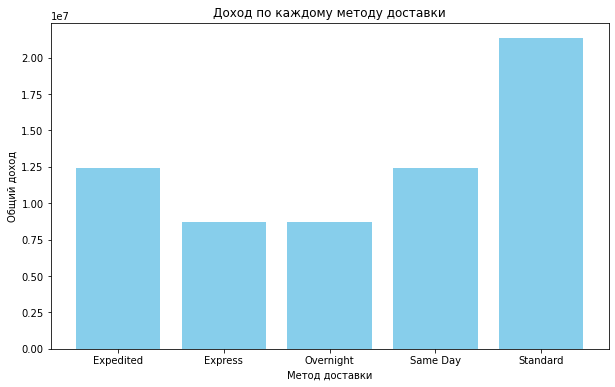

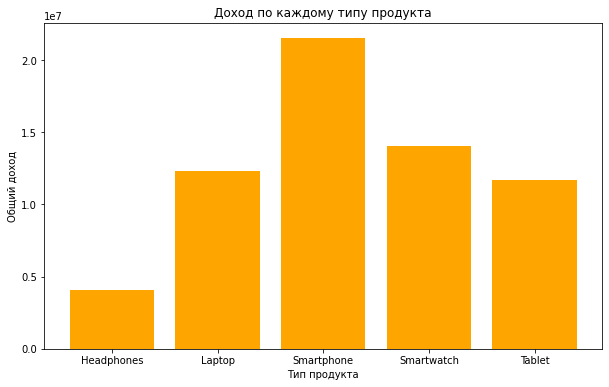

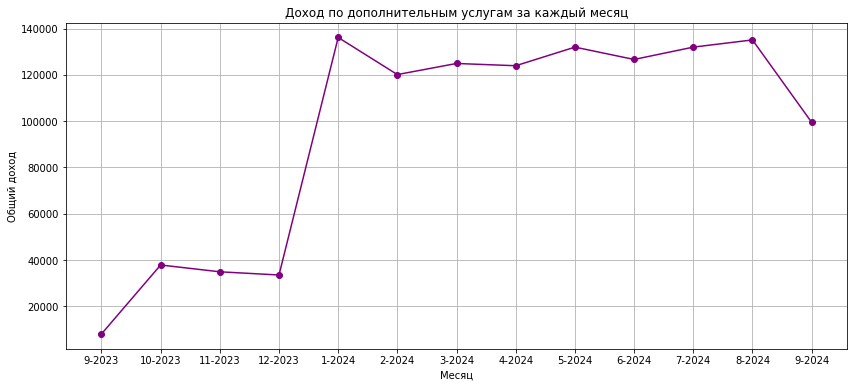

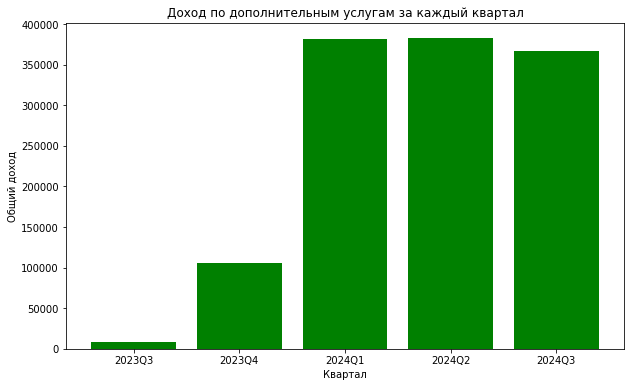

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# Визуализация 1: Доход по каждому методу доставки
plt.figure(figsize=(10, 6))
plt.bar(income_by_shipping['Shipping Type'], income_by_shipping['Total Price'], color='skyblue')
plt.title('Доход по каждому методу доставки')
plt.xlabel('Метод доставки')
plt.ylabel('Общий доход')
plt.show()

# Визуализация 2: Доход по каждому типу продукта
plt.figure(figsize=(10, 6))
plt.bar(income_by_product['Product Type'], income_by_product['Total Price'], color='orange')
plt.title('Доход по каждому типу продукта')
plt.xlabel('Тип продукта')
plt.ylabel('Общий доход')
plt.show()

# # Визуализация 3: Доход по дополнительным услугам за каждый месяц
plt.figure(figsize=(14, 6))
plt.plot(monthly_income['Month'].astype(str) + '-' + monthly_income['Year'].astype(str), 
         monthly_income['Add-on Total'], marker='o', color='purple')
plt.title('Доход по дополнительным услугам за каждый месяц')
plt.xlabel('Месяц')
plt.ylabel('Общий доход')
plt.grid()
plt.show()

# # Визуализация 4: Доход по дополнительным услугам за каждый квартал
plt.figure(figsize=(10, 6))
quad_labels = [str(q) for q in quarterly_income['Quarter']]
plt.bar(quad_labels, quarterly_income['Add-on Total'], color='green')
plt.title('Доход по дополнительным услугам за каждый квартал')
plt.xlabel('Квартал')
plt.ylabel('Общий доход')
plt.show()